In [4]:
import pandas
import vectorbt as vbt
import quantstats as qs
import warnings

warnings.filterwarnings("ignore")

In [5]:
start = "2022-01-01"
symbol = "MSFT"
benchmark = "SPY"

In [6]:
price = vbt.YFData.download(symbol, start=start, missing_index="drop").get("Close")
price.head()

Date
2021-12-31 05:00:00+00:00    331.640442
2022-01-03 05:00:00+00:00    330.092224
2022-01-04 05:00:00+00:00    324.432129
2022-01-05 05:00:00+00:00    311.977905
2022-01-06 05:00:00+00:00    309.512634
Name: Close, dtype: float64

In [7]:
benchmark_price = vbt.YFData.download(benchmark, start=start, missing_index="drop").get("Close")
#benchmark_rets.index = pandas.to_datetime(benchmark_rets.index).tz_localize(None)
benchmark_price.head()

Date
2021-12-31 05:00:00+00:00    463.877472
2022-01-03 05:00:00+00:00    466.563354
2022-01-04 05:00:00+00:00    466.407043
2022-01-05 05:00:00+00:00    457.451080
2022-01-06 05:00:00+00:00    457.021301
Name: Close, dtype: float64

In [8]:
SMA_12, SMA_24= vbt.MA.run_combs(price, window=[12,24])

In [9]:
entries = SMA_12.ma_crossed_above(SMA_24)
exits = SMA_12.ma_crossed_below(SMA_24)

In [10]:
pf = vbt.Portfolio.from_signals(price,
                                entries,
                                exits,
                                init_cash=1000,
                                direction="LongOnly",
                                )

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-02-14   2022-02-14
End Period                 2023-08-09   2023-08-09
Risk-Free Rate             0.1%         0.1%
Time in Market             28.0%        55.0%

Cumulative Return          -10.96%      -13.97%
CAGR﹪                     -5.27%       -6.78%

Sharpe                     -0.66        -0.44
Prob. Sharpe Ratio         24.29%       32.38%
Smart Sharpe               -0.61        -0.41
Sortino                    -0.85        -0.64
Smart Sortino              -0.79        -0.59
Sortino/√2                 -0.6         -0.45
Smart Sortino/√2           -0.56        -0.41
Omega                      0.92         0.92

Max Drawdown               -15.26%      -31.47%
Longest DD Days            538          498
Volatility (ann.)          15.59%       26.02%
R^2                        0.07         0.07
Information Ratio          -0.0         -0.0
Calmar       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-30,2022-12-22,2023-08-09,498,-31.466963,-30.868816
2,2022-02-16,2022-03-25,2022-03-28,40,-3.175447,-3.041517


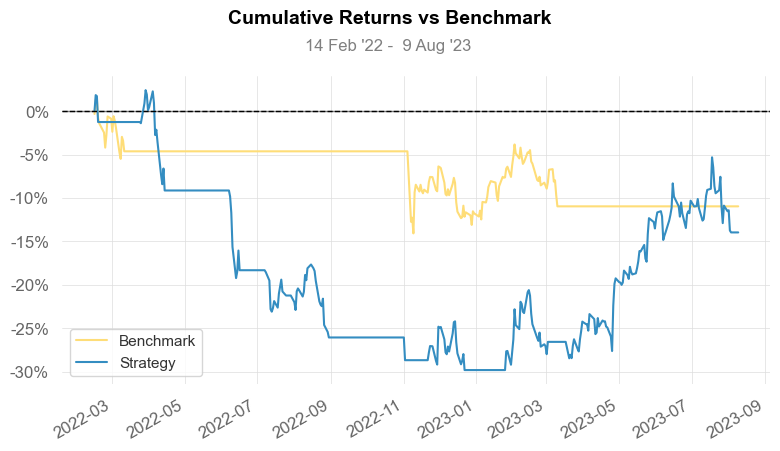

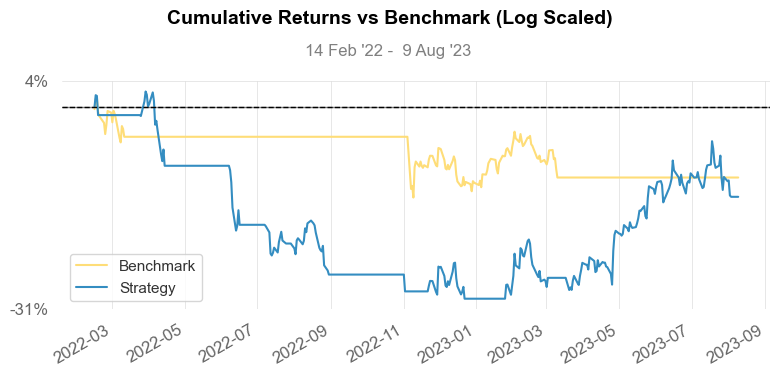

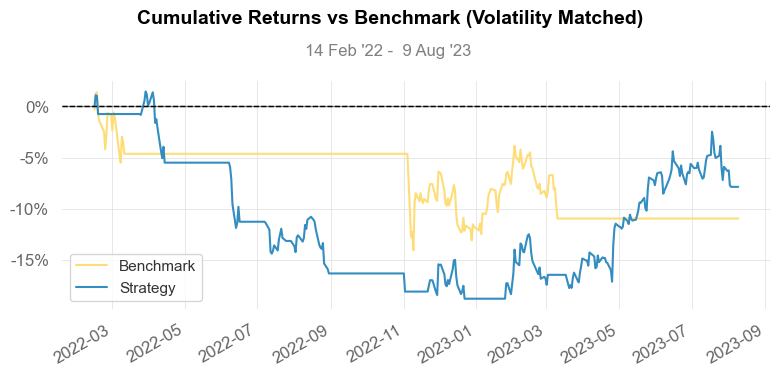

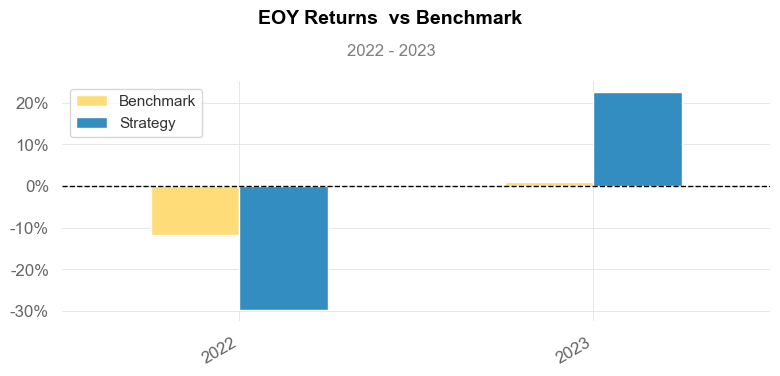

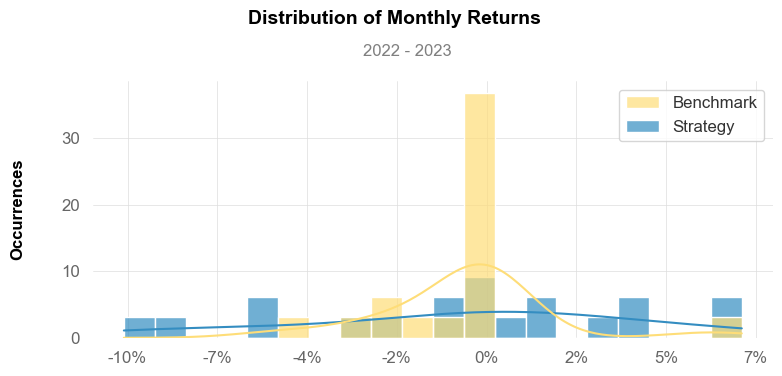

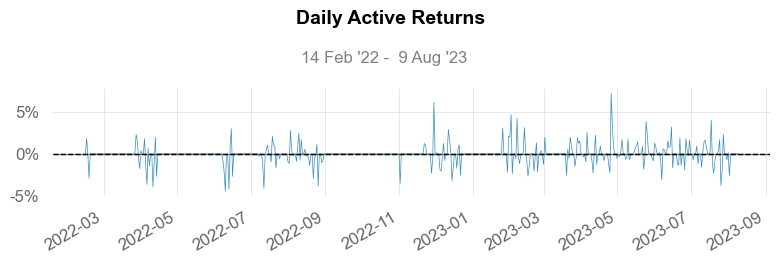

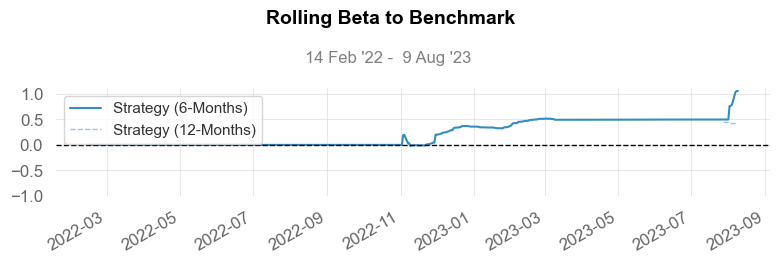

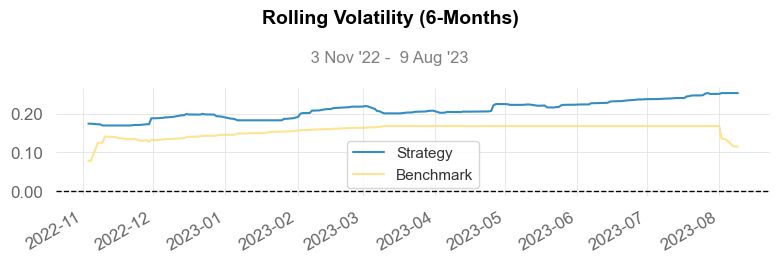

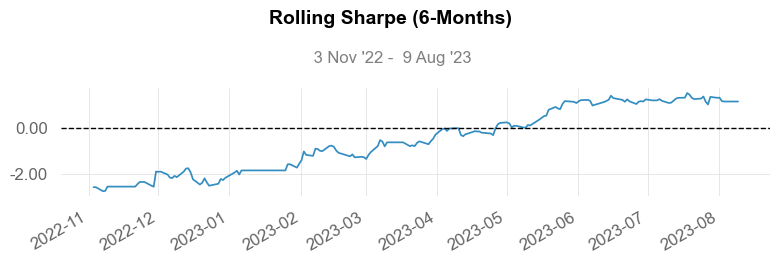

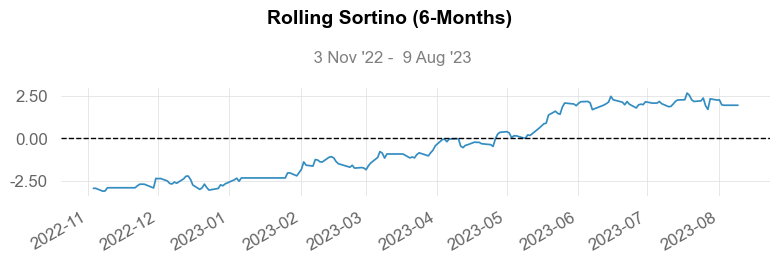

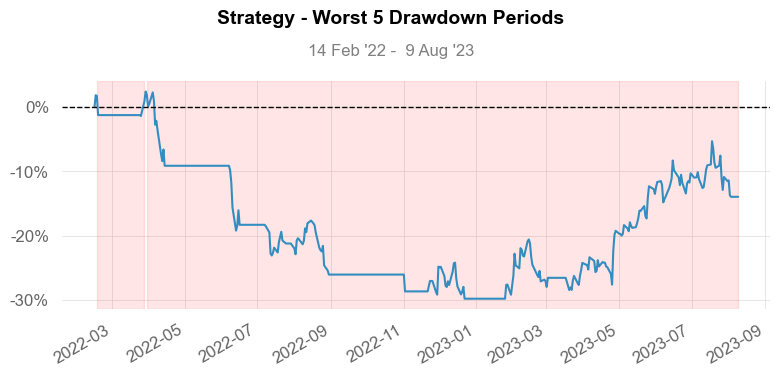

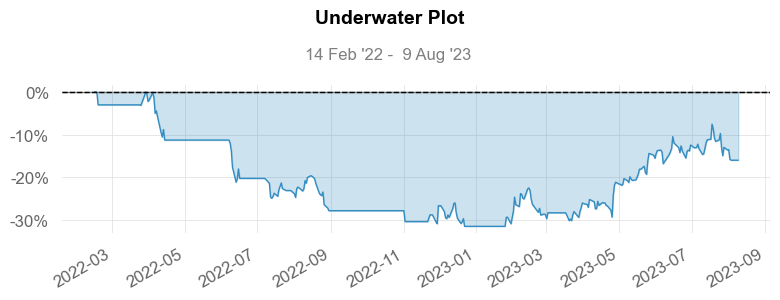

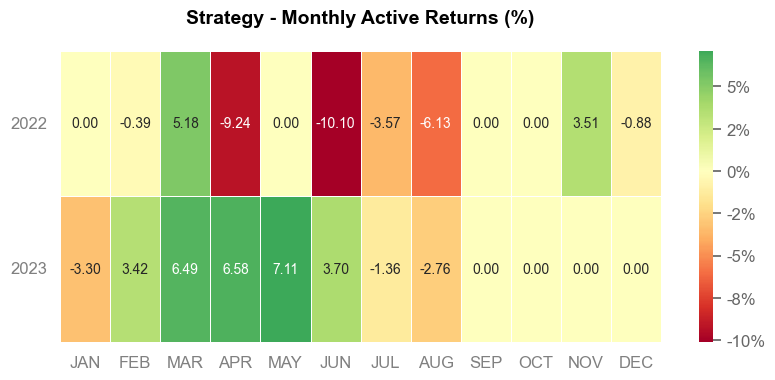

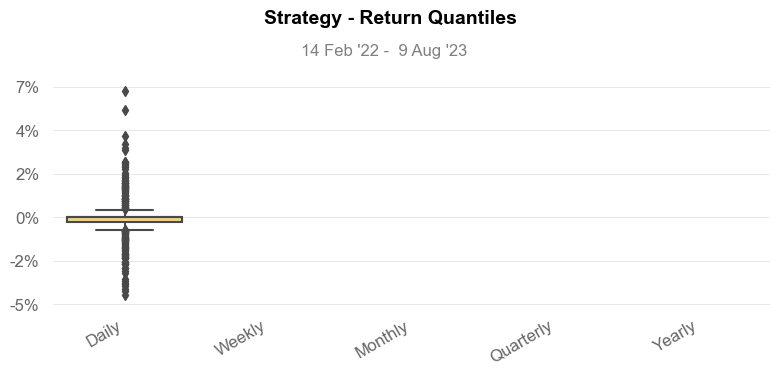

In [12]:
# make the datetime from timezone aware to timezone naive to avoid error
rets = pf.returns().tz_convert(None)
benchmark_rets = benchmark_price.pct_change().dropna().tz_convert(None)


qs_defaults = dict(
    benchmark=benchmark_rets,
    periods=365,
    periods_per_year=365,
    rf=0.001)

rets.vbt.returns.qs(defaults=qs_defaults).full_report()